In [149]:
#importing the necessary modules
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt



## The dataset contains weather data recorded from the month of January to December 2012. . 

In [151]:
# loading  the dataset into a dataframe
file_path = r'C:\Users\Gregory Bazuaye\Downloads\Project+1+-+Weather+Dataset.csv'
dataset = pd.read_csv(file_path)


### how many nullvalues does the dataset possess

In [6]:
dataset.isnull().sum() # None

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [8]:
dataset.describe() # description of properties of the numerical variables of the dataset

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


### all the unique values for the weather

In [29]:
dataset['Weather'].value_counts() # we can conclude that the weather was 'mainly clear' most of the time over the 9
# .. month period


Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

### finding the maximum temperature when the data was exactly clear

In [40]:
dataset_temp = dataset 
dataset_temp[dataset_temp['Weather'] == 'Clear']
clear_weather = dataset_temp.groupby('Weather').get_group('Clear')

clear_weather['Temp_C'].max() # the maximum temperature on a clear day was 32.8

32.8

### the average wind speed during thunderstorms

In [25]:
dataset[dataset['Weather'] == 'Thunderstorms']
thunderstorms = dataset.groupby('Weather').get_group('Thunderstorms')
max_thunderstorm_speed = thunderstorms['Wind Speed_km/h'].max()  #  the maximum windspeed during thunderstorms was 15
std_thunderstorm_speed =thunderstorms['Wind Speed_km/h'].std()
print(f' The maximum speed during thunderstorms was {max_thunderstorm_speed} with a standard deviation of {std_thunderstorm_speed}')

# the standard deviation of 10.606 indicates that there was hugh variability of wind speed over the period

 The maximum speed during thunderstorms was 15 with a standard deviation of 10.606601717798213


### displaying the relation between temperature and various weather conditions 

In [89]:
#due to the reason that there exist a lot of variations of certain weather conditions . we aggregate them all together to be able 
# .. to  one under their key weather element to fit for visualisation

dataset_2 = dataset

dataset_2.loc[dataset_2['Weather'].str.contains('snow', case=False), 'Weather'] = 'Snow'
dataset_2.loc[dataset_2['Weather'].str.contains('Thunderstorm', case=False), 'Weather'] = 'Thunderstorm'
dataset_2.loc[dataset_2['Weather'].str.contains('Rain', case=False), 'Weather'] = 'Rain'
dataset_2.loc[dataset_2['Weather'].str.contains('Fog', case=False), 'Weather'] = 'Fog'
dataset_2.loc[dataset_2['Weather'].str.contains('Drizzle', case=False), 'Weather'] = 'Drizzle'







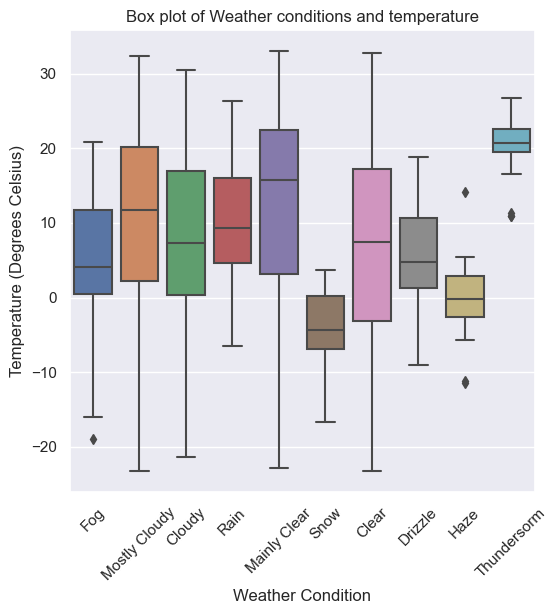

In [91]:

sb.set()
plt.figure( figsize =(6,6))
sb.boxplot(x ='Weather' , y = 'Temp_C' , data = dataset_2)
plt.title('Box plot of Weather conditions and temperature')
plt.xlabel('Weather Condition')
plt.ylabel('Temperature (Degrees Celsius)')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
# from the boxplot , for snowy seasons : 
#- the maximum temperature was about 3 degrees celsius
# - the minimum temprature was about -16 degrees celsius
#- 75% of the recorded temperatures were above the median temperature of 5 degrees celsius
# - all over the 10  year period

# for thunderstorms : 
#- the minimum temperature was about 16 degrees celsius
#- the maximum temperature was about 27 degrees celsius
# -75%  of the recordered temperature were above the the mdedian temperature of 22 degrees celsius
# all over the 10 year period

#- the largest disparation in temperature values were during Clear Weather

### the relationship between windspeed and pressure . 

In [120]:
# for this the statistical technique required is linear regression
# importing the pertinent modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

In [148]:
# extracting the windspeed and pressure from the dataset


x = dataset.iloc[ : , 4]
y = dataset.iloc[ : , 6]

#


#split the data into test and train

x_train ,x_test , y_train , y_test = train_test_split( x ,y , test_size = 0.2)


#scaling the windspeed and pressure variables
#- for windspeed , normalisation is employed 
#- for pressure , standardisation is employed to help center values about zero
normal_scaler = MinMaxScaler()
standard_scaler = StandardScaler()


x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = x-train.reshape(-1,1)
y_train = y_train.reshap(-1,1)
x_test  =x.reshape(-1,1)
y_test =y.reshape(-1,1)



x_train = normal_scaler.fit_transform(x_train)
y_train = standard_scaler.fit_transform(y_train)

x_test = normal_scaler.transform(x_test)
y_test = standard_scaler.transform(y_test)



#performing  regression on the variables

regression = LinearRegression()
regression.fit(x_train , y_train)


#fetching the coefficinent and intercept
coeff = regression.coef_[0]
intercept = regression.intercept_

#making predictions
predictions = regression.predict(x_test)

accuracy = metrics.r2_score(y_test, predictions )

#displaying the results


def conclusion ( accuracy , intercept , gradient) :
    print(f' The r2 score is {r2_score} hence it explains {r2_score *100} of the variations ')
    print(f' The coefficients and intercept are {coeff} and {intercept} respectively')

print(f'We can conclude that an increase in wind speed would result in an increase in pressure in Kpascals by a factor of {coeff}')

We can conclude that an increase in wind speed would result in an increase in pressure in Kpascals by a factor of [-3.42295879]


### predicting the weather condition using the environmental variables

In [255]:
#importing the necessary modules

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score



# Extracting the dependent and independent variables
x_vals = dataset.iloc[:, [1 ,2,3,4,5,6] ]

# Encoding the weather feature
weather_conditions = [

]

                      
encoder = LabelEncoder()
dataset['Encoded Weather'] = encoder.fit_transform(dataset['Weather'])
y_vals = dataset['Encoded Weather']
                      

# Splitting the dataset into test and train
x_train, x_test, y_train, y_test = train_test_split(x_vals, y_vals, test_size=0.2, random_state=42)

                      
# Scaling the data
normal_scaler = StandardScaler()
x_train_scaled = normal_scaler.fit_transform(x_train)
x_test_scaled = normal_scaler.transform(x_test)
                      

# Using the RandomForestClassifier to train the model
classifier = RandomForestClassifier(criterion = 'entropy' ,n_estimators=100, random_state=42)
classifier.fit(x_train_scaled, y_train)

# Making the predictions
predictions = classifier.predict(x_test_scaled)

# Calculating metrics
conf_matrix = confusion_matrix(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)


#checking accuracy

print(f"The accuracy score of the model is {accuracy}") 
def conclusion(accuracy) :
    return f' The model predicts the weather very accurrately {accuracy *100} % of the time '
conclusion(accuracy)
#expected because a lot more variables are required to very acurately predict weather





The accuracy score of the model is 0.5401252134319864


' The model predicts the weather very accurrately 54.012521343198635 % of the time '

In [251]:
#CREATING A SAMPLE WEATHER
sample_weather = [-1.2 , -2.2 , 97 , 3 , 4.6 , 90]
visual_sample = np.array(sample_weather)
visual_sample = visual_sample.reshape(1,-1)
cols = dataset.columns[1:7]
sample_weather_dataframe = pd.DataFrame(visual_sample , columns = cols)

sample_weather = np.array(sample_weather)
sample_weather = sample_weather.reshape(-1, 1)

#SCALING THE DATA
sample_weather_scaled = normal_scaler.fit_transform(sample_weather)
sample_weather_scaled = sample_weather_scaled.reshape(1,-1)
#MAKING THE PREDICTION

encoded_weather_prediction = classifier.predict(sample_weather_scaled)

#DECODING THE PREDICTION
decoded_weather_prediction = encoder.inverse_transform(encoded_weather_prediction)

print('For the sample with variables')
sample_weather_dataframe


For the sample with variables


,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
0,-1.2,-2.2,97.0,3.0,4.6,90.0


In [252]:
print(f'The preidcted weather is : {decoded_weather_prediction}')

The preidcted weather is : ['Clear']


### visualising the distribution of  temperature and atmospheric pressure by the months 

In [258]:

dataset['Date/Time'] = pd.to_datetime(dataset['Date/Time'])
dataset['Month'] = dataset['Date/Time'].dt.month




1

[Text(97.77541666666667, 0, 'Jan'),
 Text(98.28625, 0, 'Feb'),
 Text(98.79708333333332, 0, 'Mar'),
 Text(99.30791666666667, 0, 'Apr'),
 Text(99.81875, 0, 'May'),
 Text(100.32958333333335, 0, 'Jun'),
 Text(100.84041666666667, 0, 'Jul'),
 Text(101.35125, 0, 'Aug'),
 Text(101.86208333333335, 0, 'Sep'),
 Text(102.37291666666667, 0, 'Oct'),
 Text(102.88374999999999, 0, 'Nov'),
 Text(103.39458333333334, 0, 'Dec')]

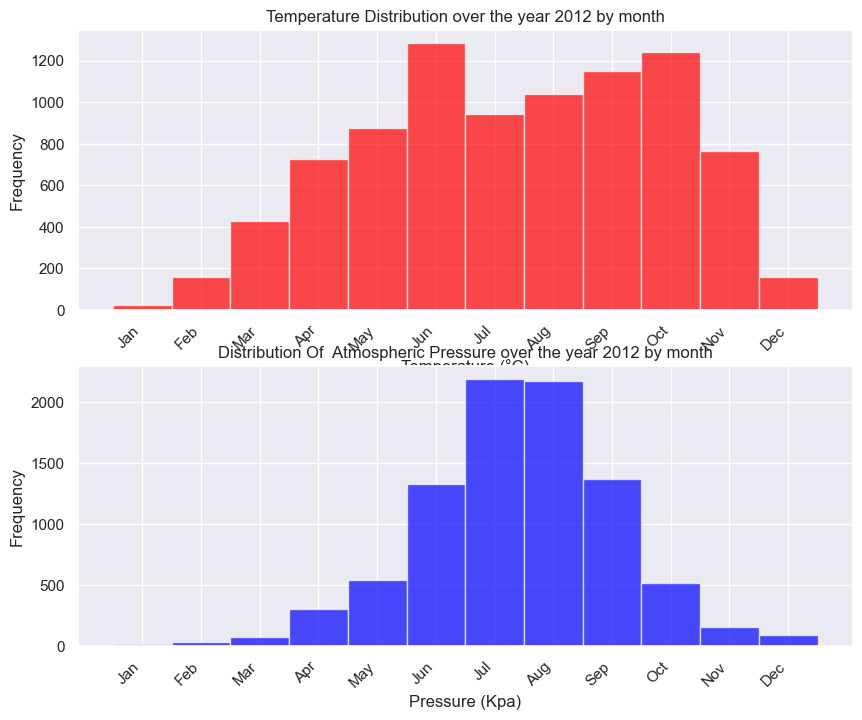

In [278]:
# HISTOGRAMS

fig ,(ax1 , ax2) = plt.subplots( 2, 1 , figsize = (10,8))

#HISTOGRAM FOR TEMPERATURE
n , bins , patches  = ax1.hist(dataset['Temp_C'] , bins = 12 , color = 'red' , alpha = 0.7)
ax1.set_title('Temperature Distribution over the year 2012 by month')
ax1.set_xlabel('Temperature (°C)')
ax1.set_ylabel('Frequency')
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
midpoints = [(bins[i] + bins[i + 1]) / 2 for i in range(len(bins) - 1)]
ax1.set_xticks(midpoints)
ax1.set_xticklabels(month_labels)
ax1.set_xticklabels(month_labels, rotation=45, ha='right') 
   
    
    
    
n2 , bins , patches_2 = ax2.hist(dataset['Press_kPa'] , bins = 12, color ='blue', alpha =0.7)
ax2.set_title('Distribution Of  Atmospheric Pressure over the year 2012 by month')
ax2.set_xlabel('Pressure (Kpa)')
ax2.set_ylabel('Frequency')
midpoints = [(bins[i] + bins[i + 1]) / 2 for i in range(len(bins) - 1)]
ax2.set_xticks(midpoints)
ax2.set_xticklabels(month_labels)
ax2.set_xticklabels(month_labels , rotation = 45 , ha ='right')





In [ ]:
#from the histogram it is evident that june was the hottest month of the year
# and also that july had the highest atmospheric pressure
# it also shows that there is not a perfect linear relationship between temperature and atmosperic pressure
# when temperature reaches a certain threshold temperature the pressure starts to decrease

### Distribution of temperature in each month#

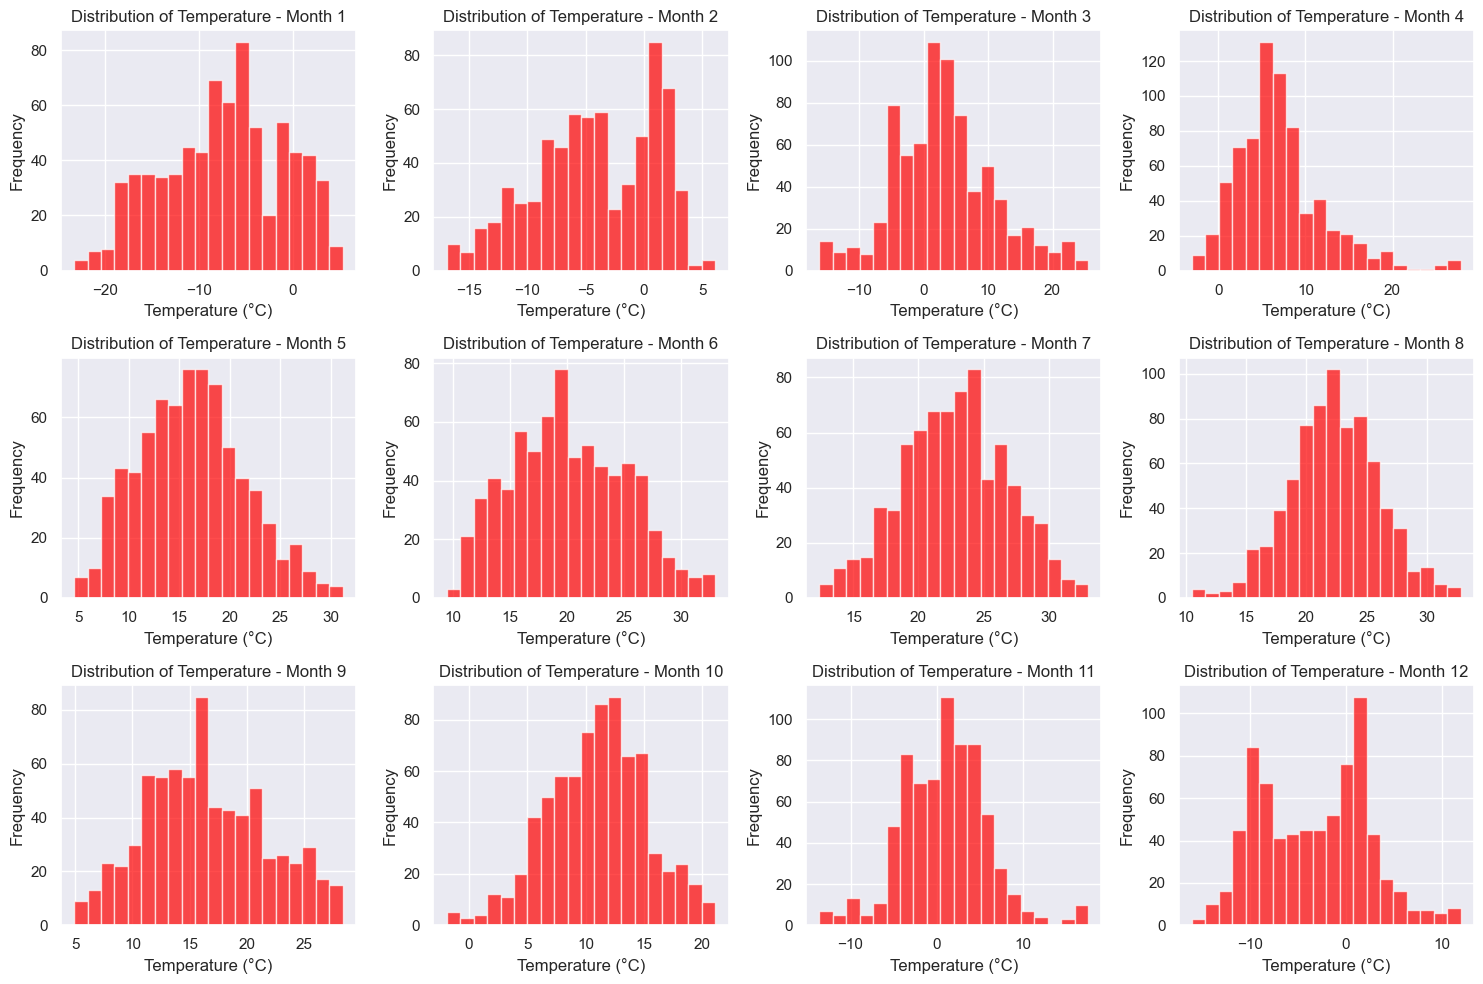

In [265]:
# Create a figure and a subplot for each month
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
months = range(1, 13)

for month, ax in zip(months, axes.flatten()):
    ax.hist(dataset[dataset['Month'] == month]['Temp_C'], bins=20, color='red', alpha=0.7)
    ax.set_title(f'Distribution of Temperature - Month {month}')
    ax.set_xlabel('Temperature (°C)')
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
# after analysis of the the histogram , one can see that the month 9 ( November) had the 
# ..most significant temperature fluctuatio